In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\programdata\anaconda3\lib\site-packages (0.23.2)


In [2]:
# Rodando o dataset
police0 = pd.read_csv('police_use_of_force.csv')
police0.head()

,X,Y,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceReportNumber,...,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,CenterGBSID,CenterLatitude,CenterLongitude,CenterX,CenterY,DateAdded,OBJECTID
0,-93.273141,44.980808,15928382,08-000149,2008/01/01 01:29:47+00,Code 3,No,MISC,NaN,1,...,322402,46998.0,23458,17121,44.980808,-93.273141,-1.038312e+07,5.618501e+06,2020/11/02 08:18:49+00,1
1,-93.251092,44.961813,15928383,08-012774,2008/01/13 03:21:52+00,Suspicious Vehicle,No,FLEE,No,2,...,322402,84018.0,10316,17023,44.961813,-93.251092,-1.038066e+07,5.615512e+06,2020/11/02 08:18:49+00,2
2,-93.266112,44.974295,15928384,08-019237,2008/01/20 03:47:57+00,Unwanted Person,Yes,OBSTRU,No,3,...,322402,46998.0,23458,21739,44.974295,-93.266112,-1.038234e+07,5.617476e+06,2020/11/02 08:18:49+00,3
3,-93.295639,45.000883,15928385,08-030704,2008/02/01 06:15:20+00,Attempt Pick-Up,No,CHLDAB,NaN,2,...,322402,80434.0,15344,22445,45.000883,-93.295639,-1.038562e+07,5.621661e+06,2020/11/02 08:18:49+00,4
4,-93.290726,45.013029,15928386,08-038956,2008/02/09 03:49:09+00,Neighbor Trouble,Yes,OBSTRU,Yes,2,...,322402,80434.0,13679,25902,45.013029,-93.290726,-1.038508e+07,5.623573e+06,2020/11/02 08:18:49+00,5


In [3]:
police0.shape

(33257, 30)

# Minerando dados

In [4]:
# Filtrando o dataset para remover entradas indesejdas cujos resultados não são proveitosos para o modelo:
police1 = police0.drop(columns=['X', 'Y', 'ForceTypeAction', 'PoliceUseOfForceID', 'CaseNumber', 'ResponseDate', 'ForceReportNumber', 'SubjectRole', 'SubjectRoleNumber', 'CenterGBSID', 'OBJECTID', 'DateAdded', 'CenterX', 'CenterY', 'CenterLatitude', 'CenterLongitude'])

**Variáveis retiradas**
* Dados relacionados a latitude e longitude foram desconsiderados, uma vez que para a análise os dados de localização baseado em distrito policial e bairro são mais proveitosos para que a análise não se torne muito complexa, uma vez que o intuito do modelo não é ver atitudes policiais em pontos muito específicos.
* As features PoliceUseOfForceID, CaseNumber, ResponseDate, ForceReportNumber, SubjectRole, SubjectRoleNumber, CenterGBSID, OBJECTID, DateAdded foram desconsideradas por se tratarem de códigos policiais que não são necessários para a análise.
* A feature ForceTypeAction foi desconsiderada pois será considerado os casos genéricos de "agressões" na feature ForceType.

In [5]:
police1.head()

,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceType,Race,Sex,EventAge,TypeOfResistance,Precinct,Neighborhood,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear
0,Code 3,No,MISC,NaN,Bodily Force,White,Male,39.0,Commission of Crime,01,Downtown West,322402,46998.0,23458
1,Suspicious Vehicle,No,FLEE,No,Bodily Force,Black,Male,30.0,Fled in Vehicle,03,Ventura Village,322402,84018.0,10316
2,Unwanted Person,Yes,OBSTRU,No,Bodily Force,Black,Male,40.0,Commission of Crime,01,Downtown West,322402,46998.0,23458
3,Attempt Pick-Up,No,CHLDAB,NaN,Bodily Force,Black,Female,35.0,Commission of Crime,04,Jordan,322402,80434.0,15344
4,Neighbor Trouble,Yes,OBSTRU,Yes,Bodily Force,Black,Male,46.0,Tensed,04,Hawthorne,322402,80434.0,13679


**Descrevendo variáveis restantes**

* Problem: Tipo de problema
* Is911Call: se o caso foi denúncia por ligação
    - No: Não foi denúncia por ligação
    - Yes: foi denúncia por ligação
* PrimaryOffense: Qual a primeira passagem pela polícia
* SubjectInjury: Se o indivíduo já estava machucado antes da intervenção policial
    - No: Não estava machucado
    - Yes: Estava machucado
* ForceType: Tipo de agressão
    - Bodily Force                  
    - Taser                         
    - Chemical Irritant              
    - Gun Point Display              
    - Improvised Weapon              
    - Police K9 Bite                 
    - Baton                          
    - Firearm                       
    - Maximal Restraint Technique    
    - Less Lethal Projectile         
    - Less Lethal      
* Race: Tipo de raça
* Sex: Tipo de sexo
* EventAge: Idade do indivíduo
* TypeOfResistance: 
* Precinct: Distrito Policial
    - 01
    - 02
    - 03
    - 04
    - 05
* Neighborhood: Bairro
* TotalCityCallsForYear: Total de ligação por ano da cidade
* TotalPrecinctCallsForYear: Total de ligações por ano do distrito
* TotalNeighborhoodCallsForYear: Total de ligações por ano do bairro

Iremos usar a variável *ForceType* como target, pois ela nos dá os tipos de força usada por policiais.

## Comparando antes e depois da remoção de Nan

In [6]:
# Fazendo limpeza para tirar os resultados indeterminados (Nan)
police2 = police1.copy()
police2.dropna(inplace=True)
police2.shape

(19262, 14)

In [7]:
police2.head()

,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceType,Race,Sex,EventAge,TypeOfResistance,Precinct,Neighborhood,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear
1,Suspicious Vehicle,No,FLEE,No,Bodily Force,Black,Male,30.0,Fled in Vehicle,03,Ventura Village,322402,84018.0,10316
2,Unwanted Person,Yes,OBSTRU,No,Bodily Force,Black,Male,40.0,Commission of Crime,01,Downtown West,322402,46998.0,23458
4,Neighbor Trouble,Yes,OBSTRU,Yes,Bodily Force,Black,Male,46.0,Tensed,04,Hawthorne,322402,80434.0,13679
5,Domestic Abuse-In Progress,Yes,DASLT5,No,Bodily Force,Black,Male,36.0,Tensed,04,Cleveland,322402,80434.0,2992
6,Suspicious Person,No,DISCON,No,Bodily Force,Black,Male,34.0,Tensed,01,Downtown West,322402,46998.0,23458


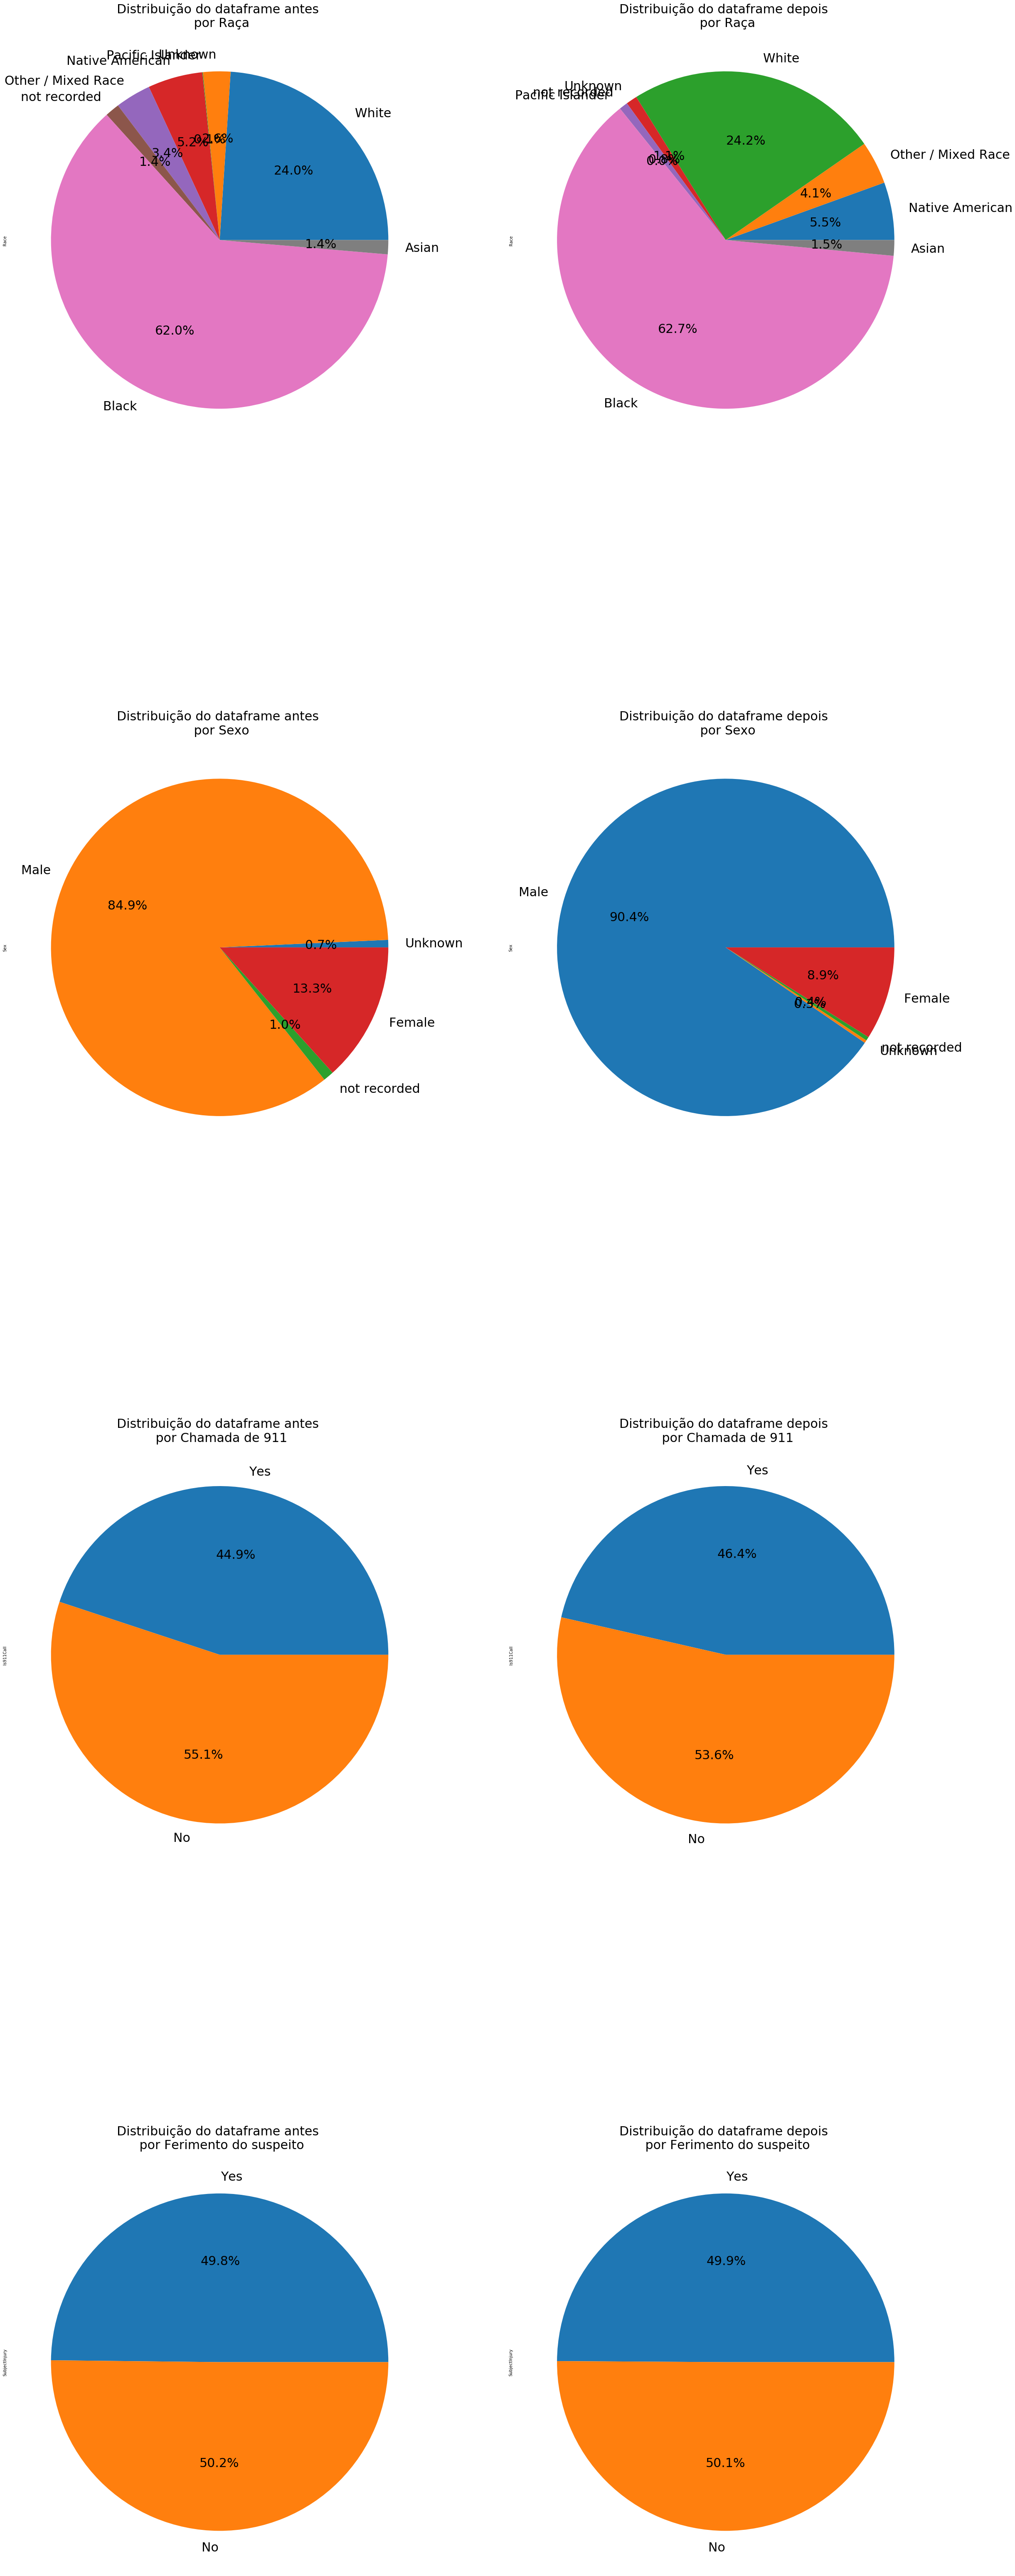

In [8]:
plt.figure(figsize=(40,120))

# Race
plt.subplot(4,2,1)
police1.Race.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe antes \n por Raça', fontsize=30)

plt.subplot(4,2,2)
police2.Race.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe depois \n por Raça', fontsize=30)

# Sex
plt.subplot(4,2,3)
police1.Sex.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe antes \n por Sexo', fontsize=30)

plt.subplot(4,2,4)
police2.Sex.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe depois \n por Sexo', fontsize=30)

# Is911Call
plt.subplot(4,2,5)
police1.Is911Call.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe antes \n por Chamada de 911', fontsize=30)

plt.subplot(4,2,6)
police2.Is911Call.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe depois \n por Chamada de 911', fontsize=30)

# SubjectInjury
plt.subplot(4,2,7)
police1.SubjectInjury.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe antes \n por Ferimento do suspeito', fontsize=30)

plt.subplot(4,2,8)
police2.SubjectInjury.value_counts(sort=False).plot.pie(autopct='%1.1f%%', textprops={'fontsize': 30})
plt.title('Distribuição do dataframe depois \n por Ferimento do suspeito', fontsize=30)

plt.fontsize=14
plt.show()

A limpeza acima não interfere significativamente nos resultados, já que ainda continuamo com muitos dados (19262).

**Depois de analisar os dados, percebe-se que os valores não mudam significativamente depois da limpeza dos valores Nan. Logo, a limpeza mostra-se proveitosa.**

In [9]:
# Frequência de cada tipo de força da target
police2['ForceType'].value_counts(True)

Bodily Force                   0.760461
Taser                          0.128024
Chemical Irritant              0.054719
Gun Point Display              0.018949
Improvised Weapon              0.016457
Police K9 Bite                 0.013965
Baton                          0.002855
Firearm                        0.002180
Maximal Restraint Technique    0.001454
Less Lethal Projectile         0.000831
Less Lethal                    0.000104
Name: ForceType, dtype: float64

In [10]:
lista_ft = []
for name in list(police2['ForceType']):
    if name not in lista_ft:
        lista_ft.append(name)
        
lista_ft

['Bodily Force',
 'Chemical Irritant',
 'Taser',
 'Improvised Weapon',
 'Baton',
 'Police K9 Bite',
 'Firearm',
 'Less Lethal Projectile',
 'Gun Point Display',
 'Maximal Restraint Technique',
 'Less Lethal']

### Análise Expoloratória 

In [11]:
census_2010 = {'Asian': '0.061', 'Black': '0.194', 'Native American': '0.014', 'Other / Mixed Race': '0.152', 'White': '0.638'}
census_2010_df = pd.DataFrame.from_dict(census_2010, orient='index')
census_2010_df.columns = ['Percentage']
census_2010_df['Percentage'] = census_2010_df['Percentage'].astype(float)

In [12]:
census_2010_df = census_2010_df.sort_index(ascending=True)
census_2010_df.style.background_gradient(cmap='Purples', subset=['Percentage'])

,Percentage
Asian,0.061
Black,0.194
Native American,0.014
Other / Mixed Race,0.152
White,0.638


In [13]:
force_race = police2.groupby(['Race'])[['ForceType']].count().reset_index()
force_race['ForceType'] = force_race['ForceType']/len(police2['ForceType'])
force_race.sort_values(by='ForceType', ascending=False).style.background_gradient(cmap='summer', subset=['ForceType'])

,Race,ForceType
1,Black,0.627193
6,White,0.242394
2,Native American,0.0552902
3,Other / Mixed Race,0.041273
0,Asian,0.0149517
5,Unknown,0.0106427
7,not recorded,0.00815076
4,Pacific Islander,0.000103831


In [14]:

tmp = force_race[force_race.Race != 'Unknown'].copy()
tmp.loc[~tmp.Race.isin(['White','Black','Asian','Native American']), 'Race'] = 'Other / Mixed Race'
tmp = tmp.groupby(['Race'], as_index=False)['ForceType'].sum()
tmp

,Race,ForceType
0,Asian,0.014952
1,Black,0.627193
2,Native American,0.055290
3,Other / Mixed Race,0.049528
4,White,0.242394


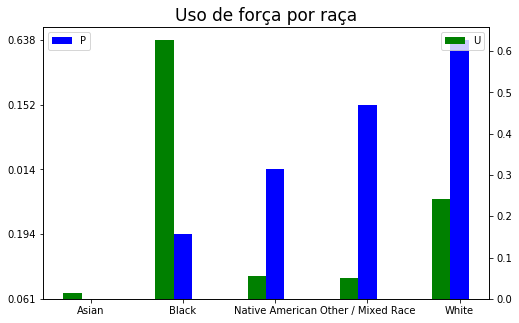

In [15]:
X = np.arange(len(census_2010_df))
plt.rcParams['xtick.labelsize'] = 10 # Definindo tamanho da fonte do título do eixo x
plt.rcParams['ytick.labelsize'] = 10 # Definindo tamanho da fonte do título do eixo y
plt.figure(figsize=(8, 5)) # Definindo tamanho do gráfico
ax = plt.subplot(111)
ax.bar(X, census_2010.values(), width=0.2, color='b', align='center')
ax2 = ax.twinx()
ax2.bar(X-0.2, tmp.ForceType, width=0.2, color='g', align='center')
ax.legend('População')
ax2.legend('Uso de força')
plt.xticks(X, census_2010.keys())
plt.title("Uso de força por raça", fontsize=17)
plt.show()

In [16]:
police2['Race'].value_counts()

Black                 12081
White                  4669
Native American        1065
Other / Mixed Race      795
Asian                   288
Unknown                 205
not recorded            157
Pacific Islander          2
Name: Race, dtype: int64

**Verificando graficamente, como se comporta a target**

In [17]:
# Data:
labels = lista_ft
frequency = []
for i in lista_ft:
    frequency.append(police2['ForceType'].value_counts()[i])

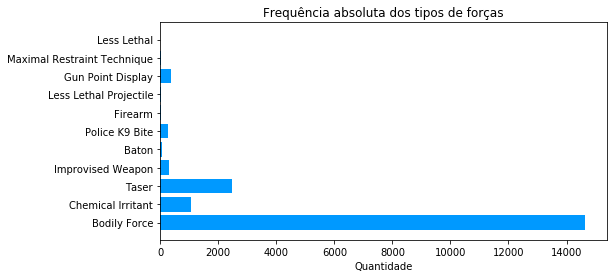

In [18]:
# Plot template
plt.figure(figsize=(8,4))
plt.title('Frequência absoluta dos tipos de forças'); plt.xlabel('Quantidade')
# Plot 
plt.barh(labels, frequency, color='#0099ff')
plt.show()

*Pelo gráfico acima, é possível identificar que o tipo de violência policial mais comum é a causada por força corporal, fato que pode ser constatado por acontecimentos recentes como o caso de George Floyd que foi sufocado por um policial: https://g1.globo.com/mundo/noticia/2020/05/29/preso-policial-suspeito-de-participar-da-morte-de-george-floyd-em-minneapolis-diz-imprensa-dos-eua.ghtml*

**Análise qualitativa da feature Race e a target ForceType**

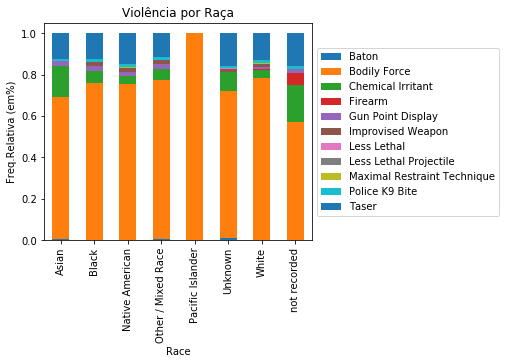

In [19]:
#Analisando a frequência do tipo de violência (target ForceType) considerando Raça (feature Race):
cross = pd.crosstab(police2["Race"], police2["ForceType"], normalize="index")
plot = cross.plot(kind='bar', stacked=True,title='Violência por Raça')
plt.ylabel('Freq.Relativa (em%)')  

 

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

*O gráfico permite entender que BodilyForce é o tipo mais comum de violência policial entre as raças.*

In [20]:
#Não seria bom tirar o pacific Islander??

**Análise qualitativa da feature Sex e a target ForceType**

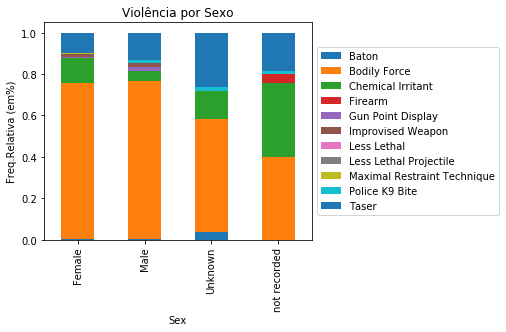

In [21]:
#Analisando a frequência do tipo de violência (target ForceType) considerando Sexo (feature Sex):
cross = pd.crosstab(police2["Sex"], police2["ForceType"], normalize="index")
plot = cross.plot(kind='bar', stacked=True,title='Violência por Sexo')
plt.ylabel('Freq.Relativa (em%)')  

 

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Análise qualitativa da feature Precinct e a target ForceType**

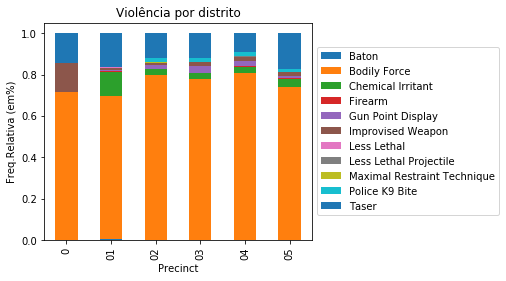

In [22]:
#Analisando a frequência do tipo de violência (target ForceType) considerando Distrito (feature Precinct):
cross = pd.crosstab(police2["Precinct"], police2["ForceType"], normalize="index")
plot = cross.plot(kind='bar', stacked=True,title='Violência por distrito')
plt.ylabel('Freq.Relativa (em%)')  

 

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Análise qualitativa da feature SubjectInjury e a target ForceType**

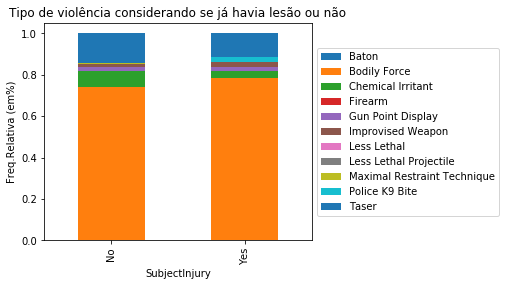

In [23]:
#Analisando a frequência do tipo de violência (target ForceType) considerando SubjectInjury (feature SubjectInjury):
cross = pd.crosstab(police2["SubjectInjury"], police2["ForceType"], normalize="index")
plot = cross.plot(kind='bar', stacked=True,title='Tipo de violência considerando se já havia lesão ou não')
plt.ylabel('Freq.Relativa (em%)')  

 

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Análise de Features Quantitativas 

In [24]:
lista_col = ['EventAge', 'TotalCityCallsForYear', 'TotalPrecinctCallsForYear', 'TotalNeighborhoodCallsForYear']

police_medidas = pd.DataFrame(police2[lista_col]).describe()
police_medidas.index = ['Quantidade total', 
                         'Média', 
                         'Desvio Padrão', 
                         'Valor mínimo', 
                         'Quartil (25%)', 
                         'Quartil (50%)', 
                         'Quartil (75%)', 
                         'Valor máximo']

police_medidas.round(3)

,EventAge,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear
Quantidade total,19262.000,19262.000,19262.000,19262.000
Média,28.961,331406.711,68479.912,11843.347
Desvio Padrão,10.391,26147.818,14067.533,9963.223
Valor mínimo,0.000,210034.000,3422.000,203.000
Quartil (25%),21.000,314926.000,53956.000,5139.000
Quartil (50%),27.000,322402.000,74407.000,8466.000
Quartil (75%),35.000,351659.000,80422.000,14049.000
Valor máximo,82.000,380794.000,90815.000,38522.000


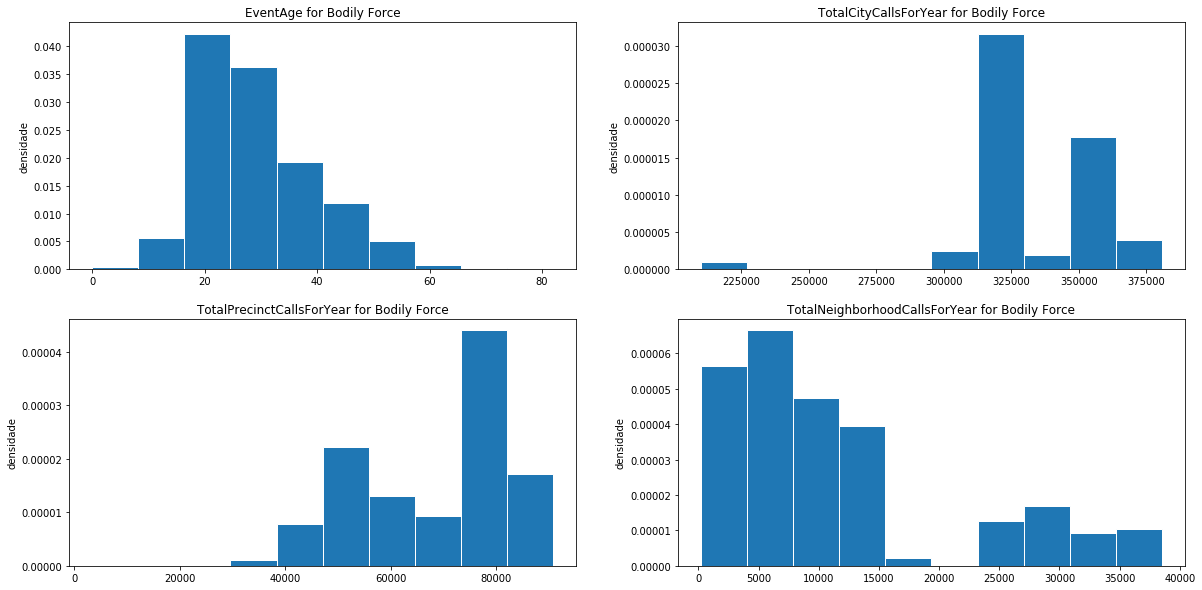

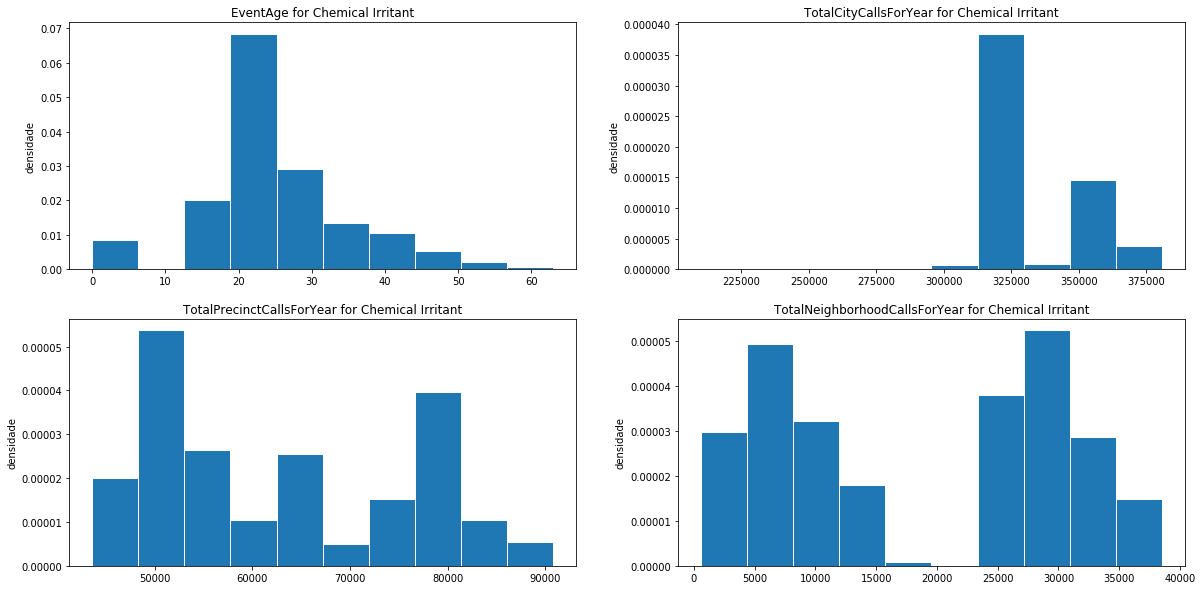

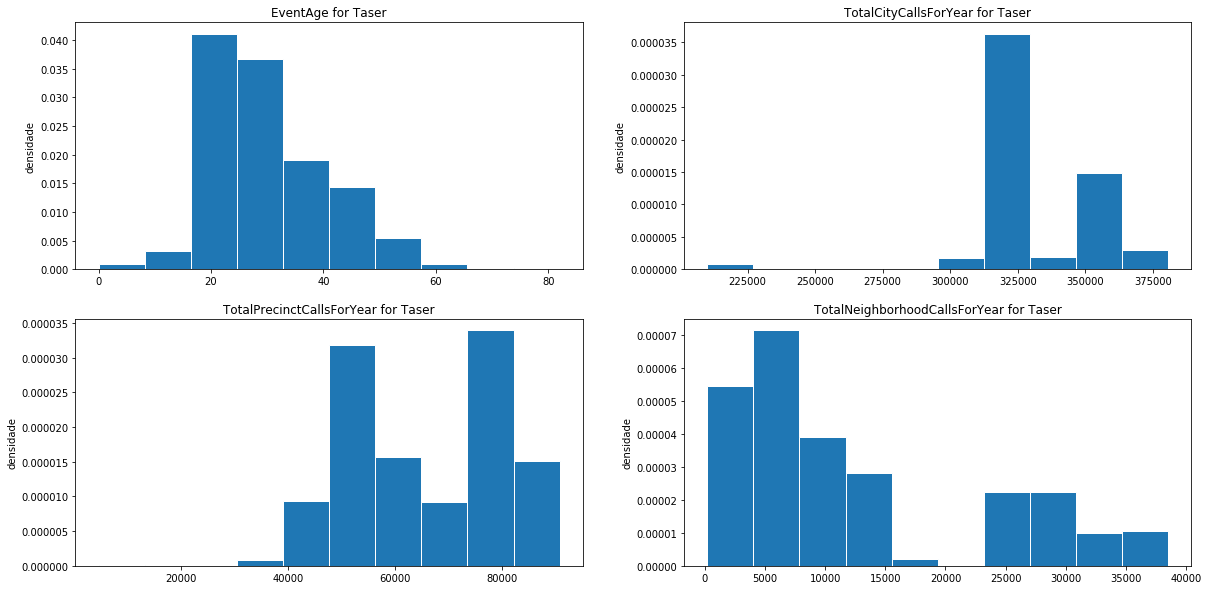

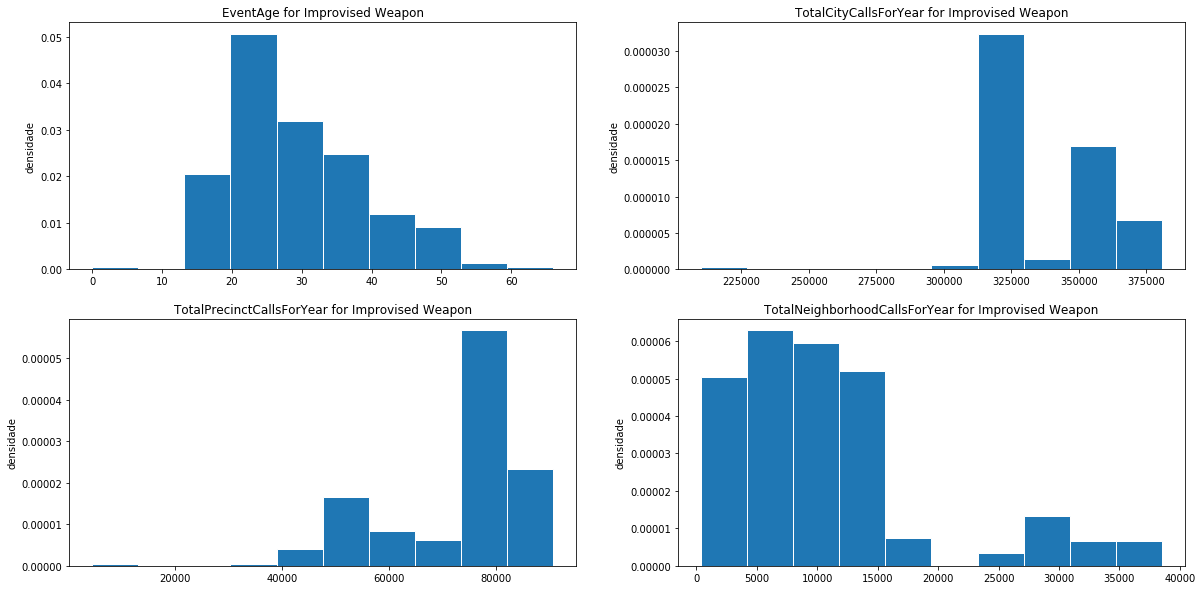

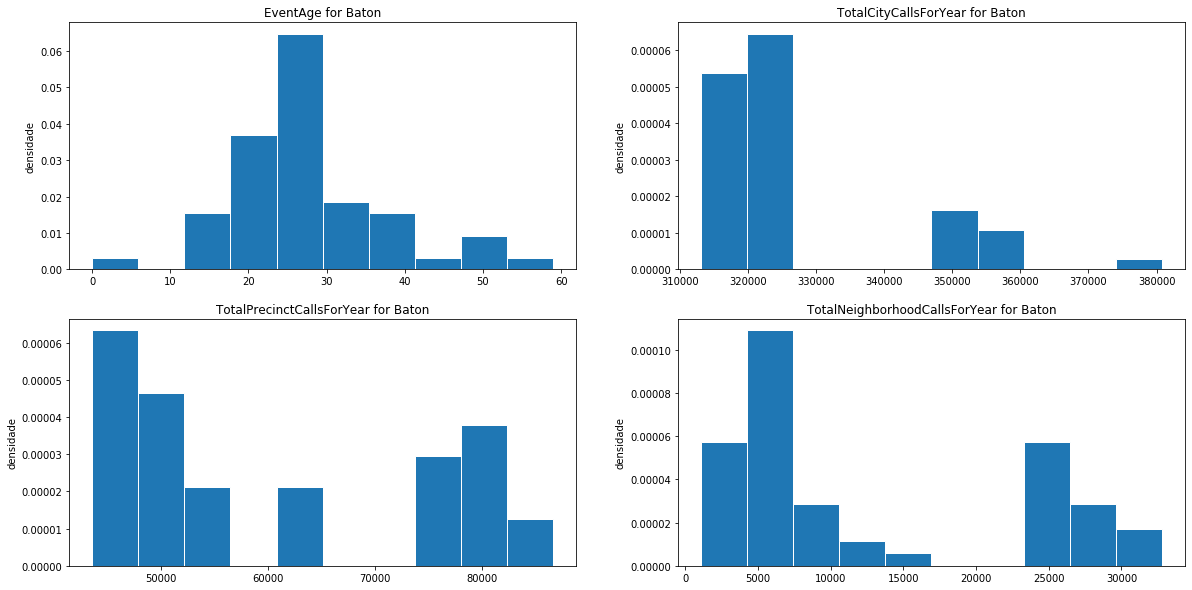

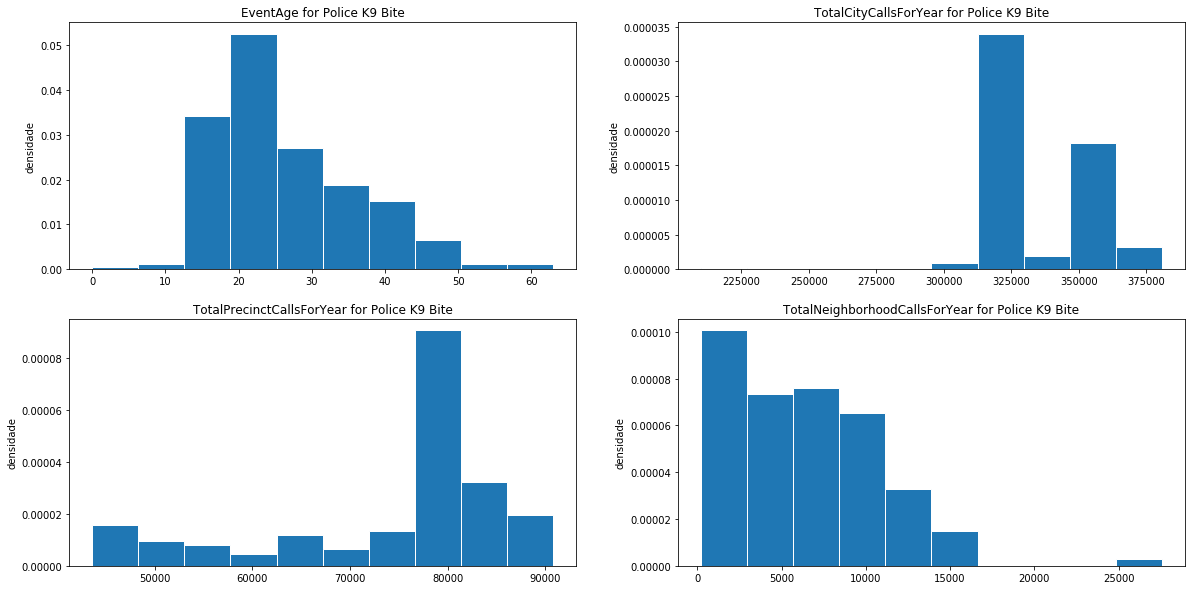

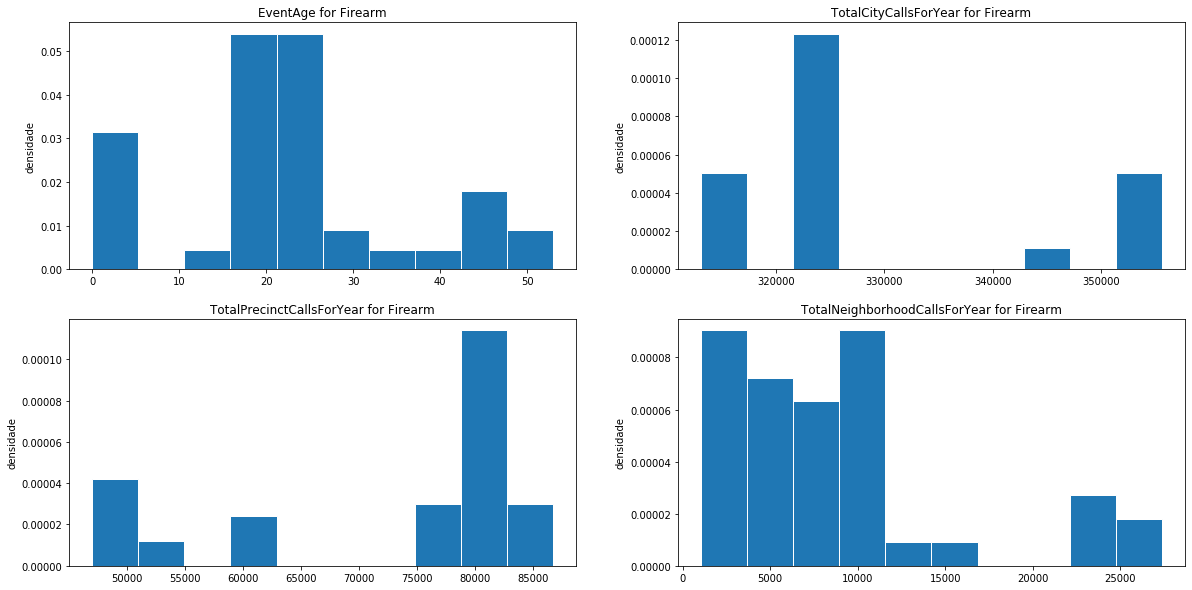

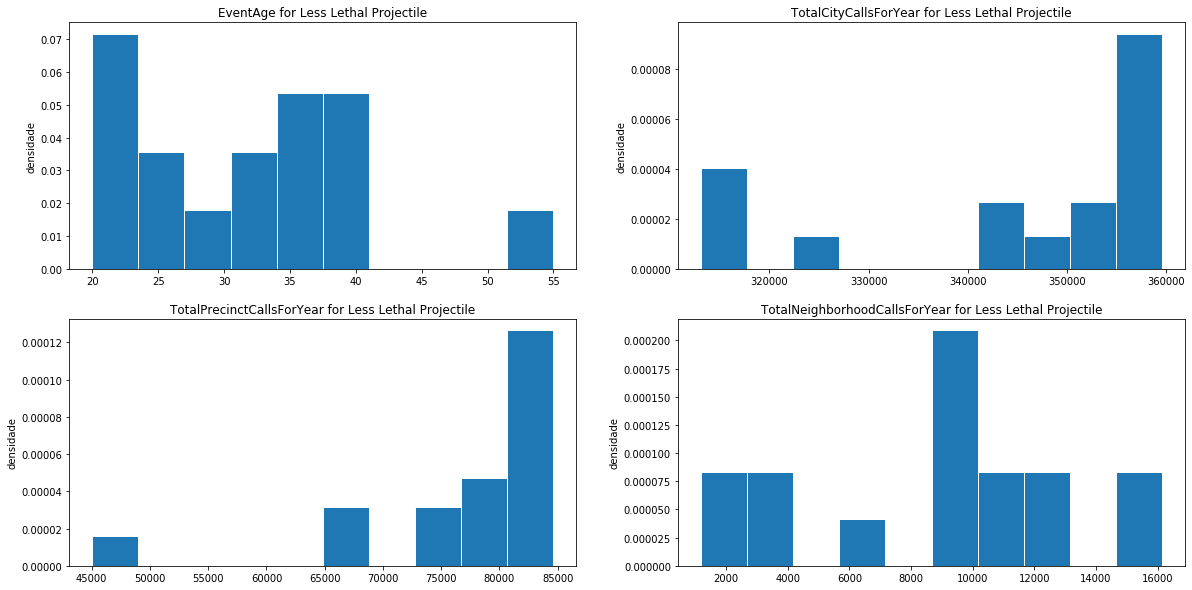

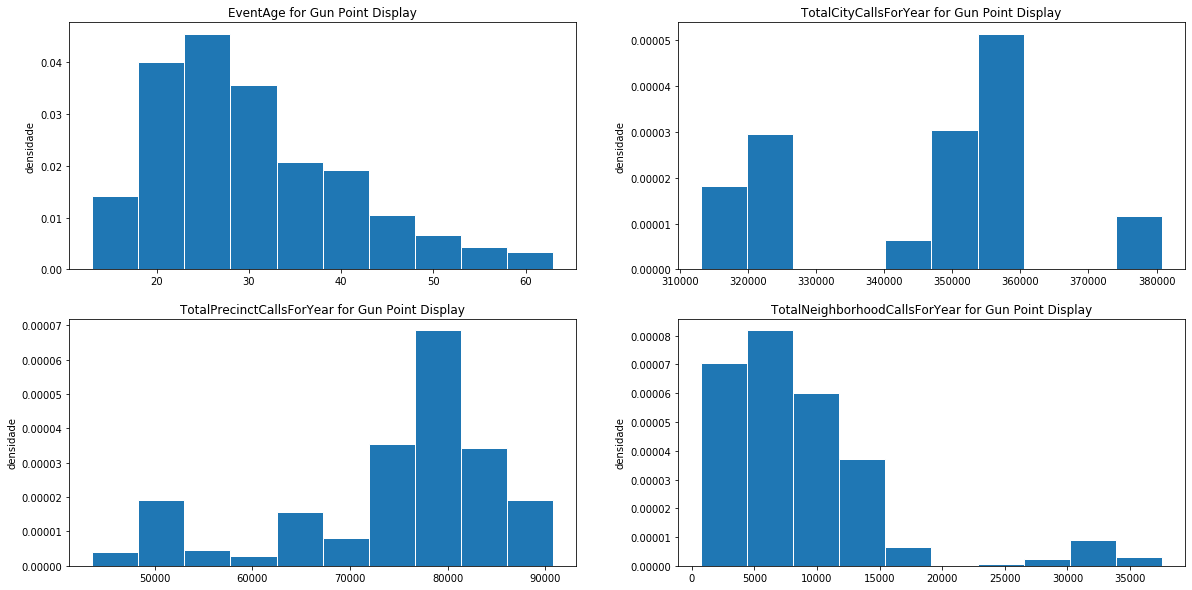

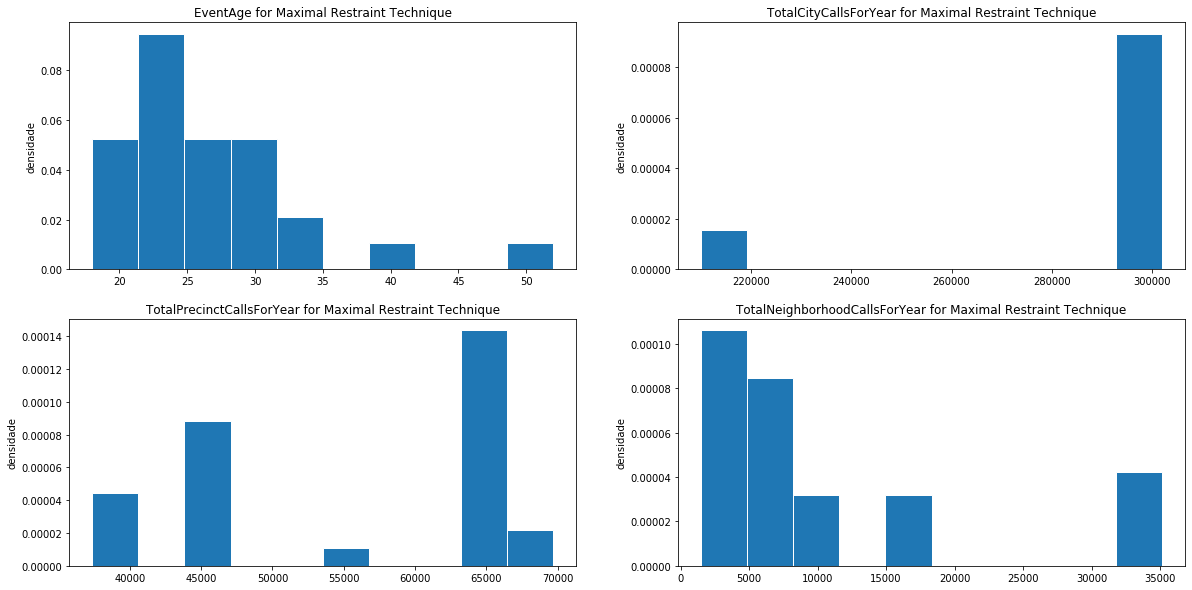

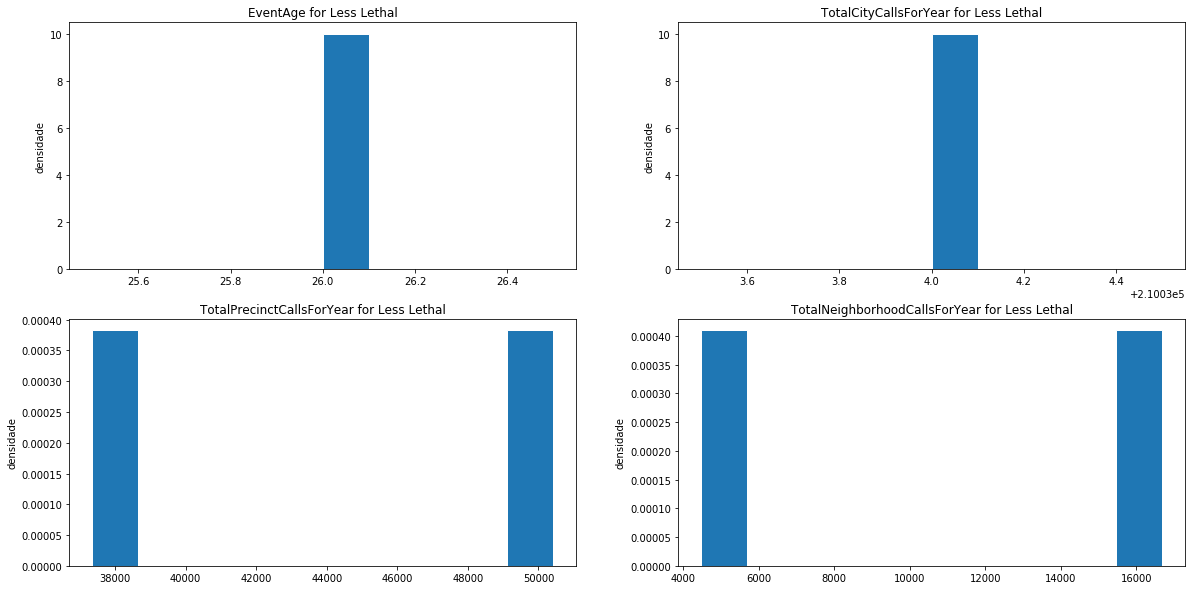

In [25]:
for ft in lista_ft:
    
    plt.figure(figsize=(20, 10))
    
    df_ = police2.loc[police2['ForceType'] == ft, :]
    
    plt.subplot(221)
    plt.hist(df_.EventAge, edgecolor='white', density=True)
    plt.ylabel('densidade')
    plt.title('EventAge for {}'.format(ft))
    
    plt.subplot(222)
    plt.hist(df_.TotalCityCallsForYear, edgecolor='white', density=True)
    plt.ylabel('densidade')
    plt.title('TotalCityCallsForYear for {0}'.format(ft))
    
    plt.subplot(223)
    plt.hist(df_.TotalPrecinctCallsForYear, edgecolor='white', density=True)
    plt.ylabel('densidade')
    plt.title('TotalPrecinctCallsForYear for {}'.format(ft))
    
    plt.subplot(224)
    plt.hist(df_.TotalNeighborhoodCallsForYear, edgecolor='white', density=True)
    plt.ylabel('densidade')
    plt.title('TotalNeighborhoodCallsForYear for {}'.format(ft))

    plt.show()

# Pré processamento

In [185]:
police3 = pd.get_dummies(police2, prefix=['Prob', '911', 'PriOff', 'SubInj', 'Race', 'Sex', 'TyOfRes', 'Precinct', 'Nbh'], columns=['Problem', 'Is911Call', 'PrimaryOffense', 'SubjectInjury', 'Race', 'Sex', 'TypeOfResistance', 'Precinct', 'Neighborhood'])

In [186]:
X = police3.iloc[:, 1:].values
y = police3.iloc[:, 0].values

In [187]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [189]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 0:4] = sc.fit_transform(X_train[:, 0:4])
X_test[:, 0:4] = sc.transform(X_test[:, 0:4])

# Modelos

# Regressão Logística

**Principais diferenças entre o modelo de regressão linear e o modelo regressão logística**

* Primeira diferença: Trançando um gráfico de dispersão em que aparece uma variável dependente e uma independente, ou seja, criando uma nuvem de pontos, na regressão linear será traçada uma reta que visa alcançar a maior quantidade de pontos possíveis, enquanto na regressão na regressão logística será traçada uma curva.
* Segunda diferença: Na regressão linear, a variável dependente é contínua, enquanto na logística, a variável dependente é uma variável categórica, que pode assumir um conjunto limitado de possibilidades (no caso do nosso modelo, pode assumir valores delimitados pela target *ForceType*).

**Intuito da Regressão Logística**

* Modelar a probabilidade de um evento ocorrer dependendo do valor das variáveis dependentes;
* Estimar a probabilidade de um evento ocorrer e de não ocorrer;
* Prever o efeito de uma série de variáveis em uma variável de resposta binária;
* Classificar as observações estimando a probabilidade de uma observação estar em categórica ou não.

Uma matriz de confusão compara os resultados reais com os resultados previstos.

Fonte: https://medium.com/@gabriel.stankevix/regress%C3%A3o-log%C3%ADstica-em-r-e-python-pytools-9f4eba2061a1#:~:text=A%20Regress%C3%A3o%20Log%C3%ADstica%20tenta%3A,que%20o%20evento%20n%C3%A3o%20ocorra

*No nosso modelo iremos utilizar a regressão logística da biblioteca Sklearn LogisticRegression*

**Testando modelo de Regressão Logística**

In [190]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
modelo_logistic = classifier.fit(X_train, y_train)
modelo_logistic

LogisticRegression(random_state=0)

In [191]:
y_pred = classifier.predict(X_test)
array_logistic = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
df_logistic = pd.DataFrame(array_logistic, columns=['Prediction', 'Test'])

In [192]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
cm_logistic = confusion_matrix(y_test, y_pred)

log_ac = []
ac = accuracy_score(y_test, y_pred)
log_ac.append(ac)

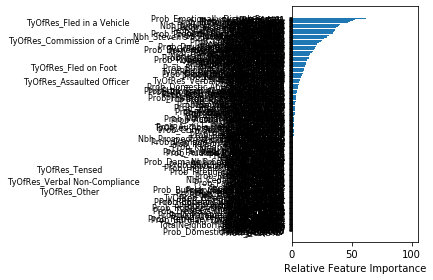

In [193]:
'''
Descobrindo variáveis importantes para o acontecimento da target
Fonte: https://stackoverflow.com/questions/24255723/sklearn-logistic-regression-important-features?rq=1
'''
feature_importance_logistic = abs(modelo_logistic.coef_[0])
feature_importance_logistic = 100.0 * (feature_importance_logistic / feature_importance_logistic.max())
sorted_idx = np.argsort(feature_importance_logistic)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance_logistic[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(police3.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

**Matriz de Confusão**

Compara os resultados reais com os resultados previstos. As linhas são os resultados reais e as colunas são os resultados previstos.
Fonte: https://medium.com/@gabriel.stankevix/regress%C3%A3o-log%C3%ADstica-em-r-e-python-pytools-9f4eba2061a1#:~:text=A%20Regress%C3%A3o%20Log%C3%ADstica%20tenta%3A,que%20o%20evento%20n%C3%A3o%20ocorra

No projeto, foi feito um mapa de calor para uma melhor visualização dos dados usando a biblioteca do *skelearn.metrics*, seguindo a documentação: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

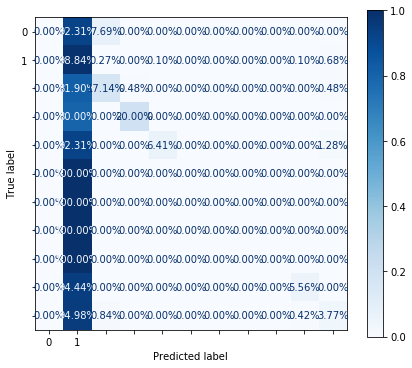

In [194]:
# Fazendo um mapa de calor para representar os dados da matriz de confusão:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(modelo_logistic, X_test, y_test, 
                      normalize='true', display_labels=['0', '1'], 
                      cmap=plt.cm.Blues, ax=ax, values_format='.2%');

Os resultados do 2º e 4º quadrantes representa os resultados os quais o modelo acertou a previsão.

# Decision Tree

**Uma árvore como forma de realizar uma predição**

Em uma árvore, o primeiro nó é chamado de raiz e os nós que não têm descendentes são chamados de folhas (resultado da predição), já as linhas que ligam os nós são chamadas de ramos.
[colocar foto de uma arvore]

Em uma árvore de decisão, a raiz representa o dataset inteiro e cada ramo equivale a uma decisão. Para um dataset, as perguntas são feitas sobre os valores das features. O processo é realizado para todo o conjunto de dados gerado pelas divisões. A análise termina quando todos os caminhos são percorridos.

Fonte: https://medium.com/turing-talks/turing-talks-17-modelos-de-predi%C3%A7%C3%A3o-decision-tree-610aa484cb05

**Testando modelo Decision Tree**

In [140]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
modelo_tree = classifier.fit(X_train, y_train)

In [141]:
y_pred = classifier.predict(X_test)

In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_tree = confusion_matrix(y_test, y_pred)

dec_ac = []
ac = accuracy_score(y_test, y_pred)
dec_ac.append(ac)
ac

0.7555151829743058

**Mapa de Calor**

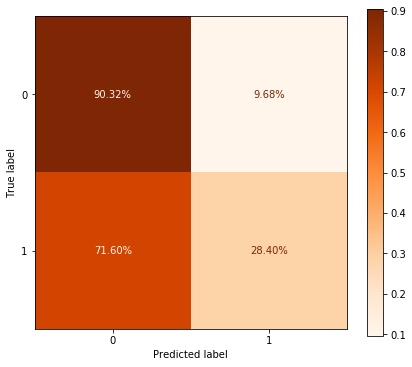

In [148]:
# Fazendo um mapa de calor para representar os dados da matriz de confusão:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(modelo_tree, X_test, y_test, 
                      normalize='true', display_labels=['0', '1'], 
                      cmap=plt.cm.Oranges, ax=ax, values_format='.2%');

# Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
modelo_random = classifier.fit(X_train, y_train)

In [172]:
y_pred = classifier.predict(X_test)

In [173]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_random = confusion_matrix(y_test, y_pred)

ran_ac = []
ac = accuracy_score(y_test, y_pred)
ran_ac.append(ac)
ac

0.7446145860368544

In [174]:
police3.head(1)

,ForceType,EventAge,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,Prob_Aircraft Crash in City,Prob_Animal Bite,Prob_Animal Call,Prob_Assault Report Only,Prob_Assault in Progress,...,Nbh_Ventura Village,Nbh_Victory,Nbh_Waite Park,Nbh_Webber - Camden,Nbh_Wenonah,Nbh_West Calhoun,Nbh_Whittier,Nbh_Willard - Hay,Nbh_Windom,Nbh_Windom Park
1,Bodily Force,30.0,322402,84018.0,10316,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Feature: 0, Score: 0.42632
Feature: 1, Score: 0.08041
Feature: 2, Score: 0.10847
Feature: 3, Score: 0.24903
Feature: 4, Score: 0.01628
Feature: 5, Score: 0.02749
Feature: 6, Score: 0.01300
Feature: 7, Score: 0.02170
Feature: 8, Score: 0.01905
Feature: 9, Score: 0.01849
Feature: 10, Score: 0.00984
Feature: 11, Score: 0.00991


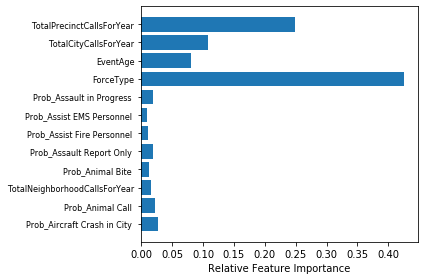

In [175]:
#Fonte: https://machinelearningmastery.com/calculate-feature-importance-with-python/
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
# get importance
importance = modelo_random.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#featax.set_xticklabels(np.array(police3.columns[sorted_idx]), fontsize=8)
#plt.show()
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(police3.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

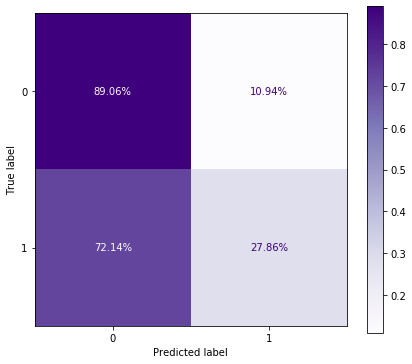

In [139]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(modelo_random, X_test, y_test, 
                      normalize='true', display_labels=['0', '1'], 
                      cmap=plt.cm.Purples, ax=ax, values_format='.2%')

## Tentando melhorar o desempenho 

Trocaremos os ForceType que não são Bodily Force por uma categoria só

In [85]:
filtra_linhas = police3['ForceType'] != 'Bodily Force'
filtra_linhas2 = police3['ForceType'] == 'Bodily Force'
df_auxiliar = police3.loc[filtra_linhas, :]
df_auxiliar2 = police3.loc[filtra_linhas2, :]

df_auxiliar['ForceType'] = 'Weapon'

police4 = pd.concat([df_auxiliar, df_auxiliar2]).sort_index()

In [86]:
X = police4.iloc[:, 1:].values
y = police4.iloc[:, 0].values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 0:4] = sc.fit_transform(X_train[:, 0:4])
X_test[:, 0:4] = sc.transform(X_test[:, 0:4])

 #### Tentando Logistico mais uma vez

In [87]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
modelo_logistic_novo = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
array_logistic = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
df_logistic = pd.DataFrame(array_logistic, columns=['Prediction', 'Test'])
df_logistic

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test, y_pred)
log_ac.append(ac)
ac

0.7713470023358422

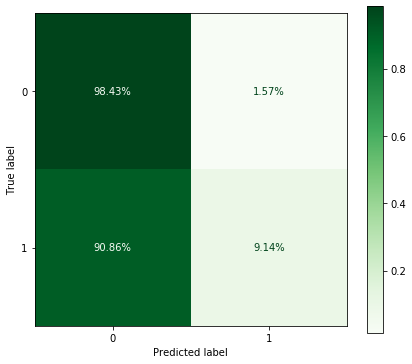

In [88]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(modelo_logistic_novo, X_test, y_test, 
                      normalize='true', display_labels=['0', '1'], 
                      cmap=plt.cm.Greens, ax=ax, values_format='.2%')

#### Tentando Decision Tree de novo

In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
modelo_tree_novo = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test, y_pred)
dec_ac.append(ac)
ac

0.7700493122242409

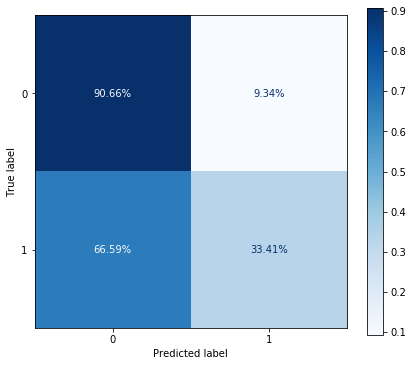

In [90]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(modelo_tree_novo, X_test, y_test, 
                      normalize='true', display_labels=['0', '1'], 
                      cmap=plt.cm.Blues, ax=ax, values_format='.2%');

##### Tentando Random Forest de novo

In [91]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
modelo_forest_novo = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test, y_pred)
ran_ac.append(ac)
ac

0.7539579548403841

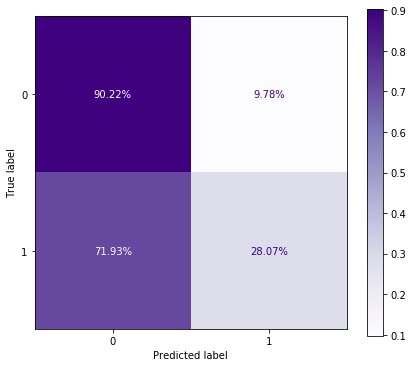

In [92]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_confusion_matrix(modelo_forest_novo, X_test, y_test, 
                      normalize='true', display_labels=['0', '1'], 
                      cmap=plt.cm.Purples, ax=ax, values_format='.2%');

## Testando o cálculo de feature importance - sugestão barbara

### Com todos os ForceType

In [93]:
X = police3.iloc[:, 1:].values
y = police3.iloc[:, 0].values

In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, 0:4] = sc.fit_transform(X[:, 0:4])

##### Decision Tree

In [96]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)


In [97]:
# Fazendo um data frame com o nome das suas colunas e suas respectivas importâncias
df1 = pd.DataFrame()
df1['feature_importance'] = feat_importance
df1['nome'] = police3.columns[1:]

In [98]:
filtra_linhas = df1['feature_importance'] > 0.003 
df2 = df1.loc[filtra_linhas, :]

features_list = []
for feat in df2['nome']:
    features_list.append(feat)
    
features_list.append('ForceType')

police5 = police3[features_list].copy()


In [99]:
X = police5.iloc[:, :-1].values
y = police5.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
modelo_tree_2 = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
ac = accuracy_score(y_test, y_pred)
dec_ac.append(ac)
ac

0.7402024396574098

### Com apenas 2 ForceType

In [100]:
X = police4.iloc[:, 1:].values
y = police4.iloc[:, 0].values

In [101]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, 0:4] = sc.fit_transform(X[:, 0:4])

#### Decision Tree

In [103]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)


In [104]:
# Fazendo um novo data frame com o nome das colunas e suas respectivas importâncias
df3= pd.DataFrame()
df3['feature_importance'] = feat_importance
df3['nome'] = police4.columns[1:]

In [105]:
filtra_linhas = df3['feature_importance'] > 0.003 
df4 = df3.loc[filtra_linhas, :]

features_list2 = []
for feat in df3['nome']:
    features_list2.append(feat)
    
features_list2.append('ForceType')

police6 = police4[features_list].copy()


In [106]:
X = police6.iloc[:, :-1].values
y = police6.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
modelo_tree_3 = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
ac = accuracy_score(y_test, y_pred)
dec_ac.append(ac)
ac

0.7555151829743058

## Resultados

In [107]:
log_ac.append(0)
log_ac.append(0)
log_ac

[0.761484557487672, 0.7713470023358422, 0, 0]

In [108]:
dec_ac

[0.7588891772644693,
 0.7700493122242409,
 0.7402024396574098,
 0.7555151829743058]

In [109]:
ran_ac.append(0)
ran_ac.append(0)
ran_ac


[0.7459122761484558, 0.7539579548403841, 0, 0]

In [110]:
resultados= pd.DataFrame(index=['Todos ForceType / Todas Features', 'Dois ForceType / Todas Features', 'Todos ForceType / Features Importantes', 'Dois ForceType / Features Importantes'])
resultados['Logistic Regression'] = log_ac
resultados['Decision Tree'] = dec_ac
resultados['Random Forest'] = ran_ac

resultados

,Logistic Regression,Decision Tree,Random Forest
Todos ForceType / Todas Features,0.761485,0.758889,0.745912
Dois ForceType / Todas Features,0.771347,0.770049,0.753958
Todos ForceType / Features Importantes,0.000000,0.740202,0.000000
Dois ForceType / Features Importantes,0.000000,0.755515,0.000000
